In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
spambase = fetch_openml(name='spambase', version=1, as_frame=True)

# Features and target
X = spambase.data
y = spambase.target.astype(int)  # Convert target to integer

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
model = LogisticRegression(max_iter=6000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,6000
,multi_class,'deprecated'


In [5]:
y_pred = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 92.29098805646036 %


In [7]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[506  25]
 [ 46 344]]


In [8]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



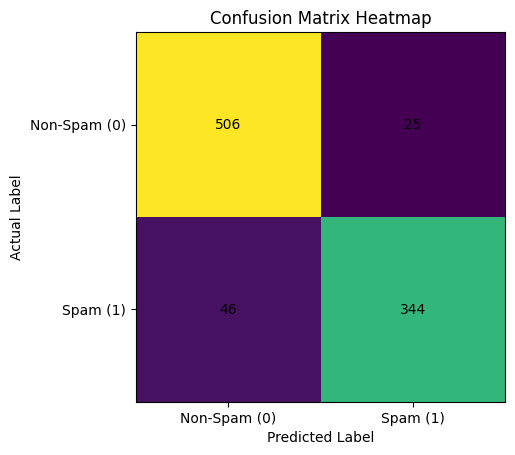

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap-style confusion matrix
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Axis labels
plt.xticks([0, 1], ["Non-Spam (0)", "Spam (1)"])
plt.yticks([0, 1], ["Non-Spam (0)", "Spam (1)"])

# Display values inside the heatmap
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()